# wine데이터 셋으로 PCA 적용하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
from sklearn.datasets import load_wine
wine = load_wine()

In [4]:
#정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

### -PCA변환

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#시각화를 위해서 2로 만드는 것.

In [9]:
wine_pca = pca.fit_transform(wine_std)
wine_pca[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

In [10]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [11]:
wine_pca_df = pd.DataFrame(wine_pca, columns=['PC1','PC2'])
wine_pca_df['target'] = wine.target
wine_pca_df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


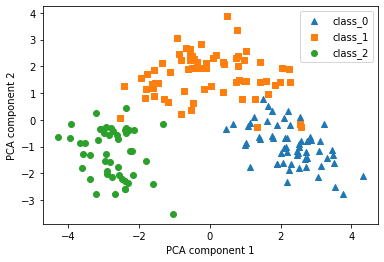

In [13]:
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x_axis_data = wine_pca_df[wine_pca_df.target == i]['PC1']
    y_axis_data = wine_pca_df[wine_pca_df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker= marker,
                label = wine.target_names[i])
plt.legend()
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.show()